In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import librosa as lb
import librosa.display

import os

### Handeling Class Imbalance

In [2]:
diagnosis=pd.read_csv('data/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [3]:
sns.countplot(diagnosis.disease)
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'URTI'

In [4]:
def extractId(filename):
    return filename.split('_')[0]

In [5]:
path='data/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,220,220_1b2_Al_mc_LittC2SE_3.wav
1,154,154_2b4_Al_mc_AKGC417L_5.wav
2,130,130_2p5_Lr_mc_AKGC417L_3.wav
3,211,211_2p3_Tc_mc_AKGC417L_4.wav
4,221,221_2b3_Lr_mc_LittC2SE_3.wav


In [6]:
files_df.pid=files_df.pid.astype('int64') # both pid's must be of same dtype for them to merge

In [7]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,220,220_1b2_Al_mc_LittC2SE_3.wav,COPD
1,220,220_1b2_Al_mc_LittC2SE_2.wav,COPD
2,220,220_1b2_Al_mc_LittC2SE_0.wav,COPD
3,220,220_1b2_Al_mc_LittC2SE_1.wav,COPD
4,220,220_1b2_Al_mc_LittC2SE_5.wav,COPD


In [8]:
sns.countplot(data.disease)
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'COPD'

In [9]:
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [10]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

COPD              0.832979
Healthy           0.046588
Pneumonia         0.041369
URTI              0.035183
Bronchiolitis     0.023197
Bronchiectasis    0.015078
LRTI              0.004639
Asthma            0.000967
Name: disease, dtype: float64

In [11]:
Xval.disease.value_counts()/Xval.shape[0]

COPD              0.833043
Healthy           0.046957
Pneumonia         0.041159
URTI              0.035362
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000580
Name: disease, dtype: float64

# Visualizing MFCCS 

[Text(0.5, 1.0, 'MFCC')]

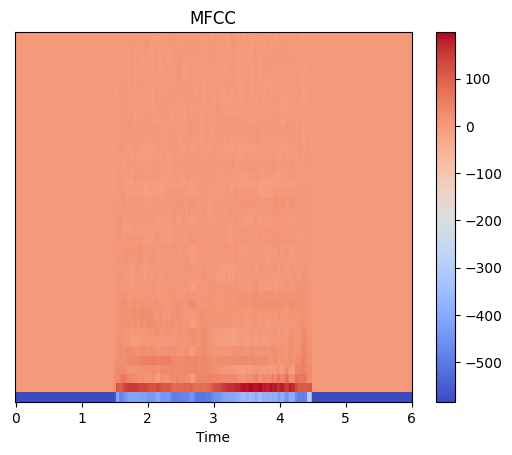

In [12]:
path='data/processed_audio_files/'

file=path + Xtrain.iloc[193].filename 
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

* saving **train & test datasets** for future use..

In [13]:
Xtrain.to_csv('data/train.csv')
Xval.to_csv('data/val.csv')